In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('heart.csv') # importing the dataset
data.head() # Displaying the first 5 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
data.shape

(1025, 14)

In [11]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
data.isnull().sum() # Cheking for Missing Values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [19]:
data.duplicated().sum() # Checking for duplicated values

723

In [21]:
data = data.drop_duplicates() # droping the duplicate values

In [23]:
data.shape

(302, 14)

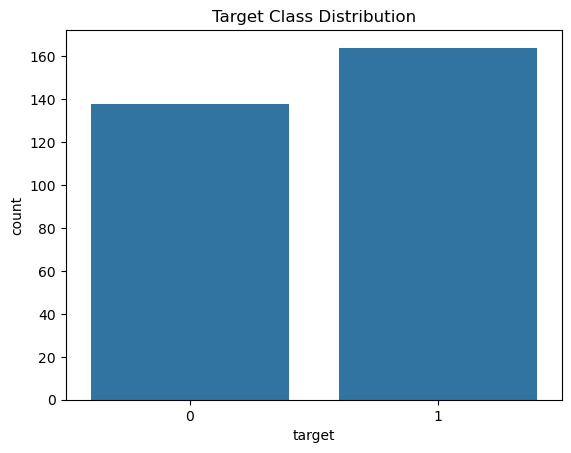

target
1    0.543046
0    0.456954
Name: proportion, dtype: float64


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=data) # showing the distribution of target class
plt.title('Target Class Distribution')
plt.show()

print(data['target'].value_counts(normalize=True))

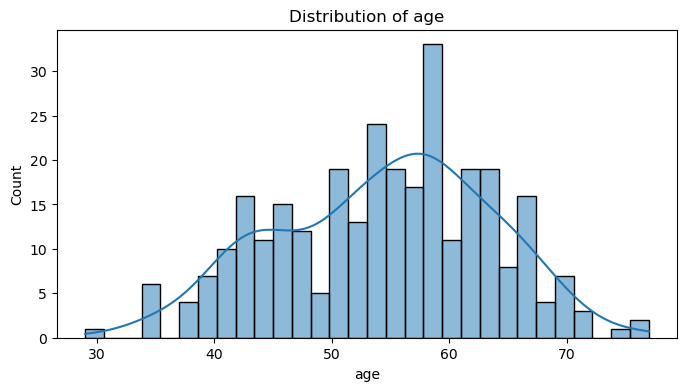

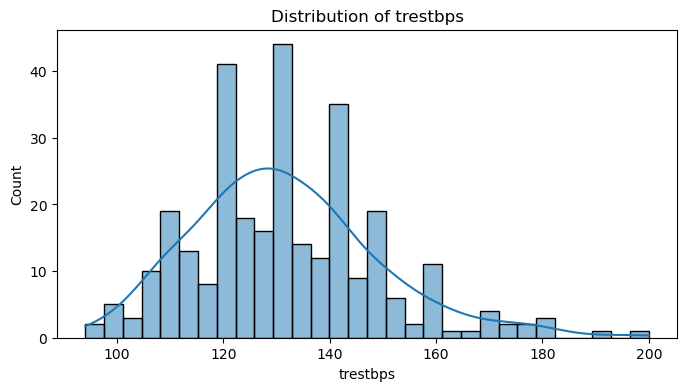

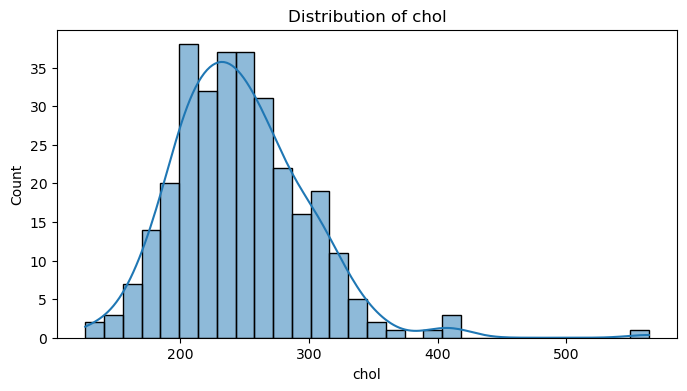

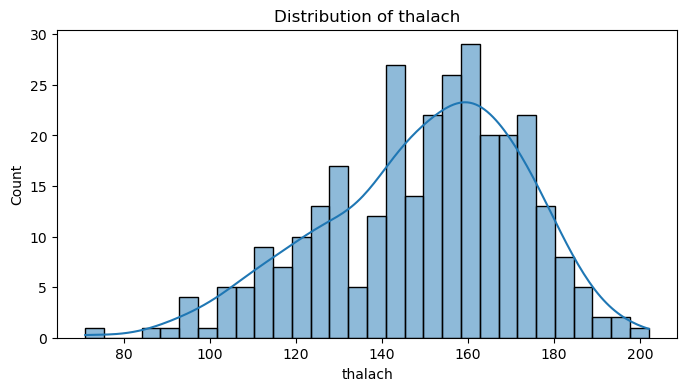

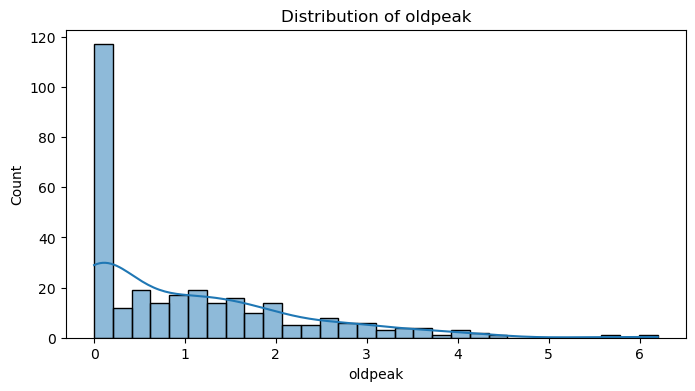

In [34]:
# Distribution of columns

numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

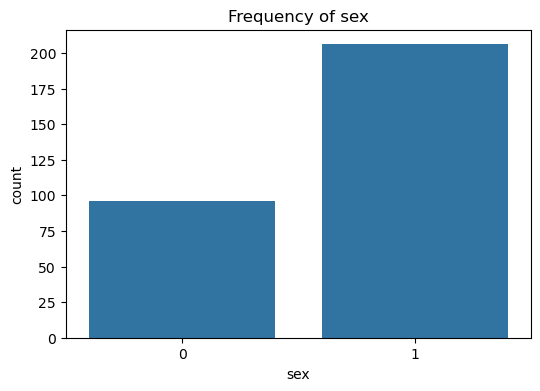

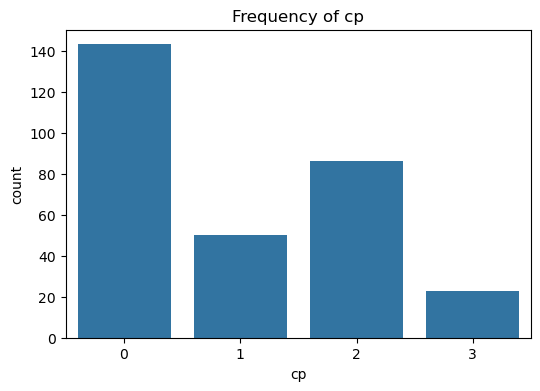

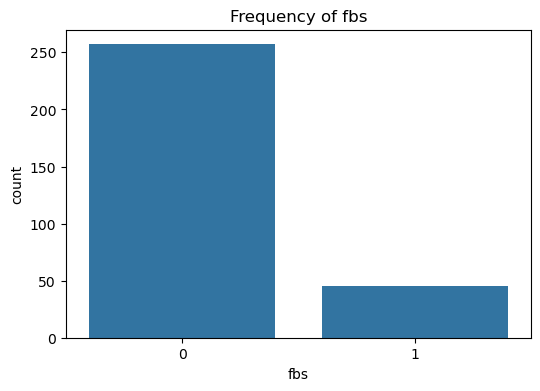

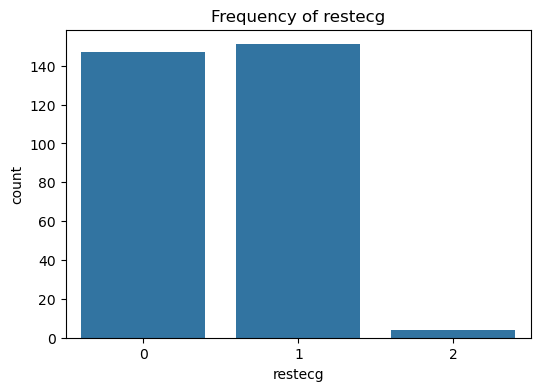

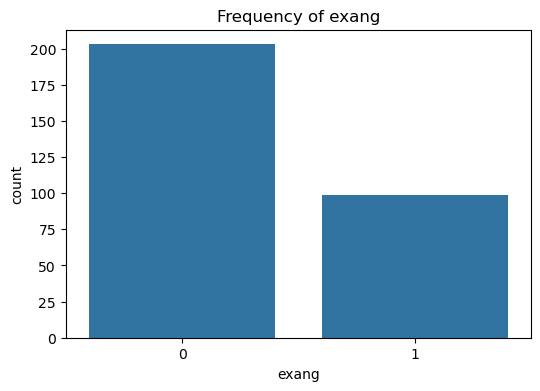

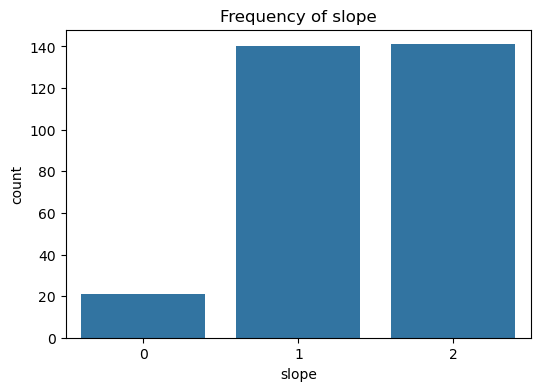

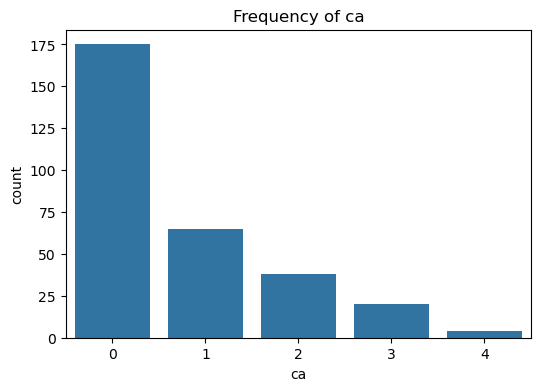

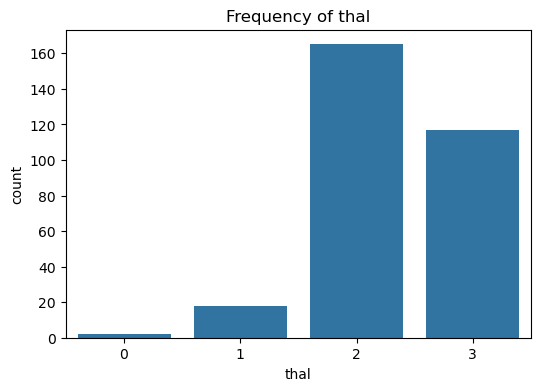

In [38]:
# Categorical Features Distribution (See the frequency of each category for quick pattern identification.)

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=data)
    plt.title(f'Frequency of {col}')
    plt.show()

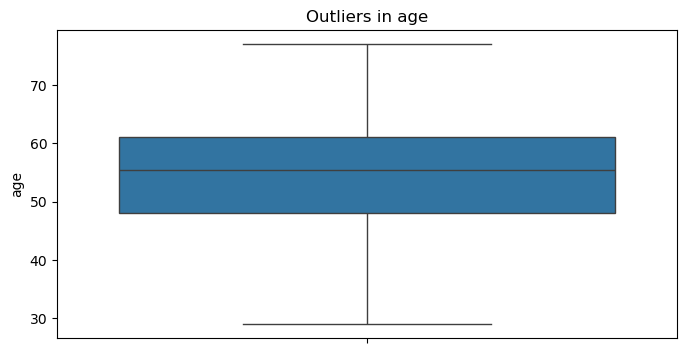

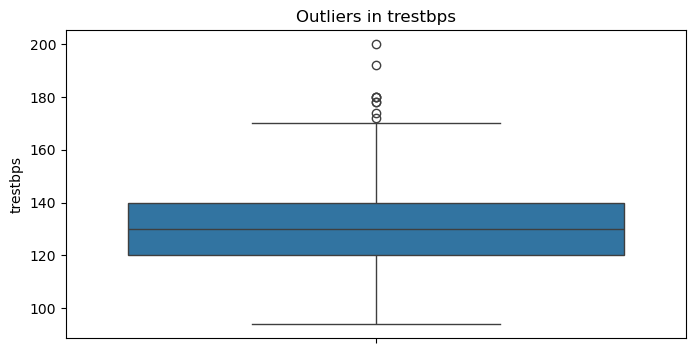

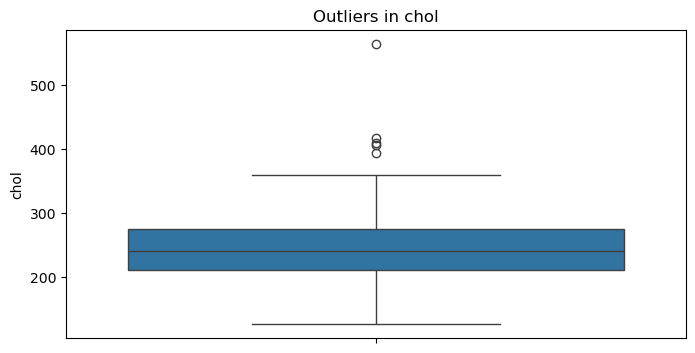

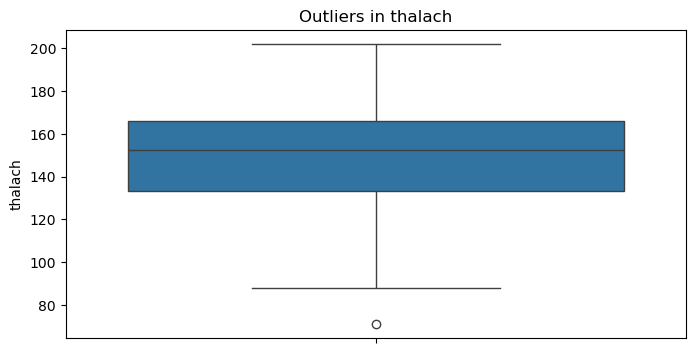

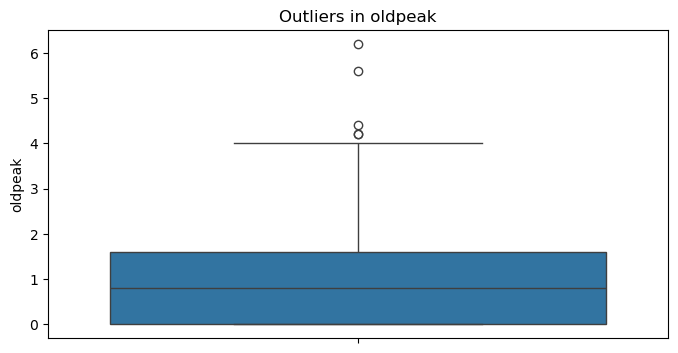

In [36]:
# Outlier Detection

for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(y=data[col])
    plt.title(f'Outliers in {col}')
    plt.show()

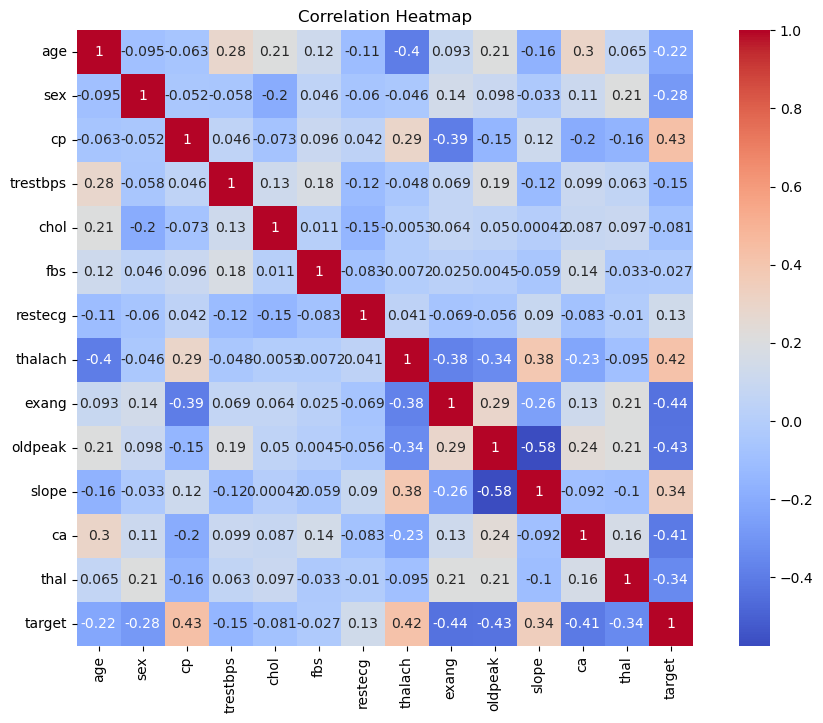

In [40]:
# Look for highly correlated features with the target (positive or negative).

plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

1.Train a Decision Tree Classifier and visualize the tree.

In [42]:
# Features and Target

X = data.drop('target', axis=1)
y = data['target']

In [46]:
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree

dtree = DecisionTreeClassifier(max_depth=5, random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [50]:
# Predict

y_pred = dtree.predict(X_test)

In [52]:
# Evaluate

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.7377049180327869
[[25  7]
 [ 9 20]]
              precision    recall  f1-score   support

           0       0.74      0.78      0.76        32
           1       0.74      0.69      0.71        29

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



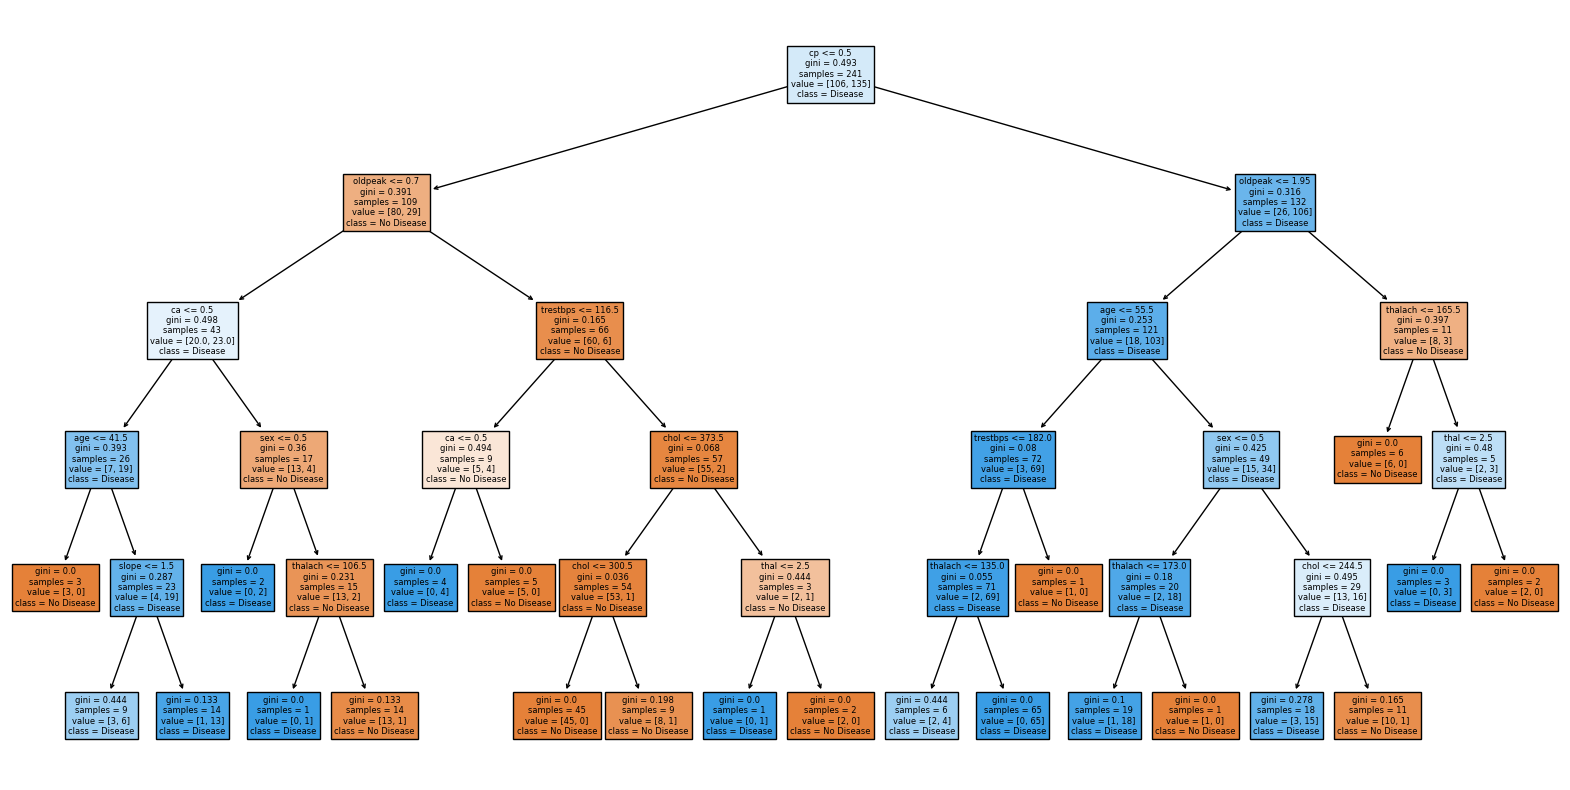

In [54]:
from sklearn.tree import plot_tree

# Visualize Tree
plt.figure(figsize=(20,10))
plot_tree(dtree, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.show()

2. Analyze overfitting and control tree depth.

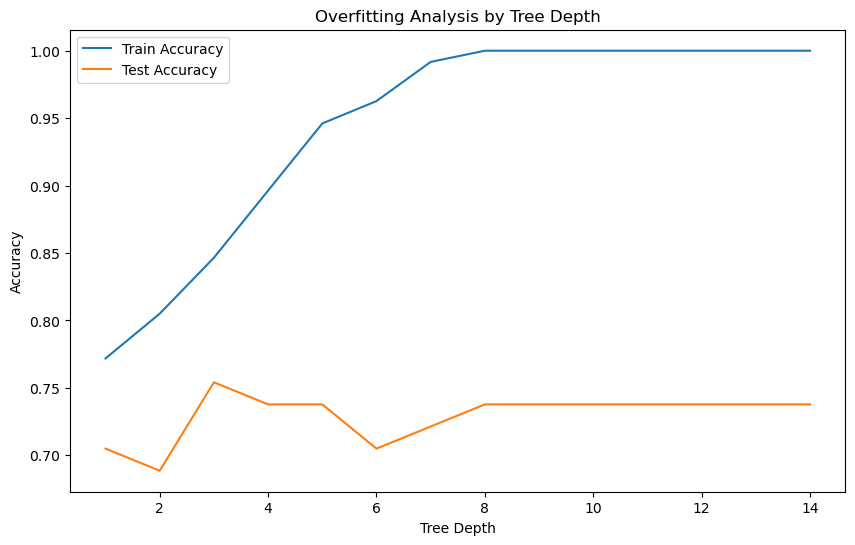

In [57]:
# Test different tree depths
train_scores = []
test_scores = []
depths = range(1, 15)

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    train_scores.append(dt.score(X_train, y_train))
    test_scores.append(dt.score(X_test, y_test))

plt.figure(figsize=(10,6))
plt.plot(depths, train_scores, label='Train Accuracy')
plt.plot(depths, test_scores, label='Test Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Overfitting Analysis by Tree Depth')
plt.show()

3. Train a Random Forest and compare accuracy.

In [62]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rforest = RandomForestClassifier(n_estimators=100, random_state=42)
rforest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [64]:
# Predict

y_pred_rf = rforest.predict(X_test)

In [66]:
# Evaluate

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8360655737704918
[[25  7]
 [ 3 26]]
              precision    recall  f1-score   support

           0       0.89      0.78      0.83        32
           1       0.79      0.90      0.84        29

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [69]:
# Here, we can see random forest classifier has more accuracy than decision tree.

4. Interpret feature importances.

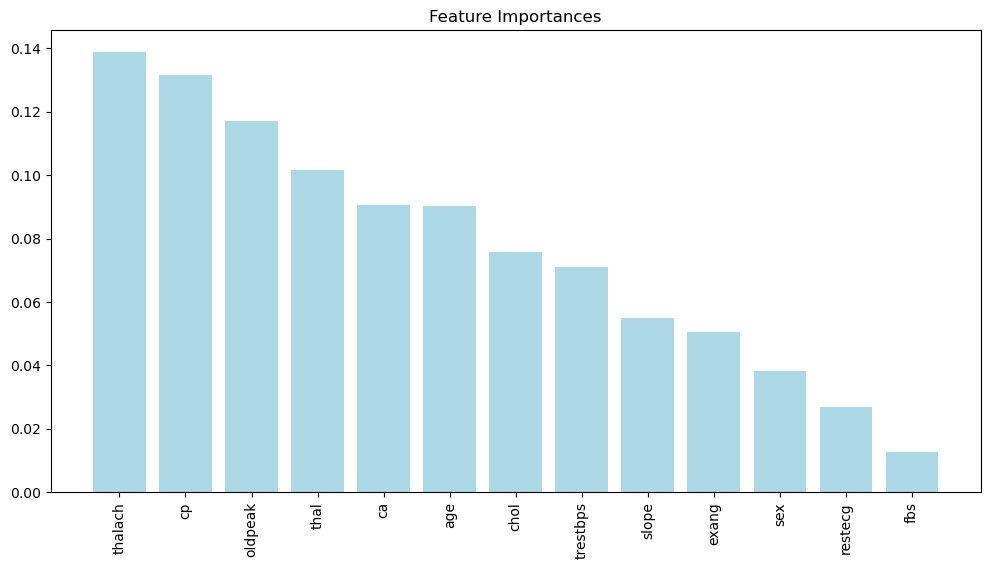

In [73]:
# Feature Importance

import numpy as np

importances = rforest.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], color='lightblue', align='center')
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.show()

5. Evaluate using cross-validation.

In [78]:
# Cross-Validation

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rforest, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.83606557 0.81967213 0.9        0.8        0.78333333]
Mean CV Accuracy: 0.8278142076502732
